# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-mu.new.57.72.167.176.191.fix.120.155.157.163.164.165.174.188.prep'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
177591,2020-08-12,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177592,2020-08-13,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177593,2020-08-14,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177594,2020-08-15,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177595,2020-08-16,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
177591,2020-08-12,Colombia,Vichada,6,4,0,2
177592,2020-08-13,Colombia,Vichada,6,4,0,2
177593,2020-08-14,Colombia,Vichada,6,1,0,5
177594,2020-08-15,Colombia,Vichada,6,1,0,5
177595,2020-08-16,Colombia,Vichada,6,1,0,5


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
210,2020-08-12,16474,3918,336,12220
211,2020-08-13,16680,3816,338,12526
212,2020-08-14,17069,3883,338,12848
213,2020-08-15,17454,3842,338,13274
214,2020-08-16,17714,4102,338,13274


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-12,20620089,7112047,751217,12756825,0.018216,0.309330,0.055613
2020-08-13,20931051,7255262,760927,12914862,0.018177,0.308510,0.055640
2020-08-14,21145446,7174141,766032,13205273,0.018113,0.312249,0.054829
2020-08-15,21436035,7304869,771970,13359196,0.018006,0.311606,0.054629
2020-08-16,21436516,7344251,771970,13320295,0.018006,0.310692,0.054780


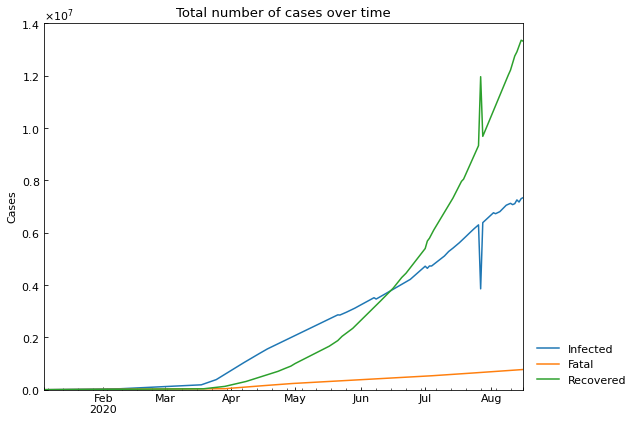

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
221,2020-08-12,51360,15420,1065,34875
222,2020-08-13,52534,15344,1076,36114
223,2020-08-14,53894,15338,1085,37471
224,2020-08-15,55121,15128,1092,38901
225,2020-08-16,55595,54503,1092,38438


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
182,2020-08-11,48928,13901,1052,33975
183,2020-08-12,50210,14263,1059,34888
184,2020-08-13,51147,13950,1063,36134
185,2020-08-14,52217,13665,1073,37479
186,2020-08-15,53577,13547,1085,38945


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
177591,2020-08-12,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177592,2020-08-13,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177593,2020-08-14,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177594,2020-08-15,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177595,2020-08-16,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
174151,COL,Colombia,Vichada,2020-08-12,107808
174152,COL,Colombia,Vichada,2020-08-13,107808
174153,COL,Colombia,Vichada,2020-08-14,107808
174154,COL,Colombia,Vichada,2020-08-15,107808
174155,COL,Colombia,Vichada,2020-08-16,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
177591,2020-08-12,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177592,2020-08-13,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177593,2020-08-14,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177594,2020-08-15,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
177595,2020-08-16,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
177591,2020-08-12,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
177592,2020-08-13,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
177593,2020-08-14,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
177594,2020-08-15,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
177595,2020-08-16,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
221,2020-08-12,1,1,1,0,0,1,1,3,2,2,1,30.56
222,2020-08-13,1,1,1,0,0,1,1,3,2,2,1,30.56
223,2020-08-14,1,1,1,0,0,1,1,3,2,2,1,30.56
224,2020-08-15,1,1,1,0,0,1,1,3,2,2,1,30.56
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
221,2020-08-12,1,1,1,0,0,1,1,3,2,2,1,30.56
222,2020-08-13,1,1,1,0,0,1,1,3,2,2,1,30.56
223,2020-08-14,1,1,1,0,0,1,1,3,2,2,1,30.56
224,2020-08-15,1,1,1,0,0,1,1,3,2,2,1,30.56
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

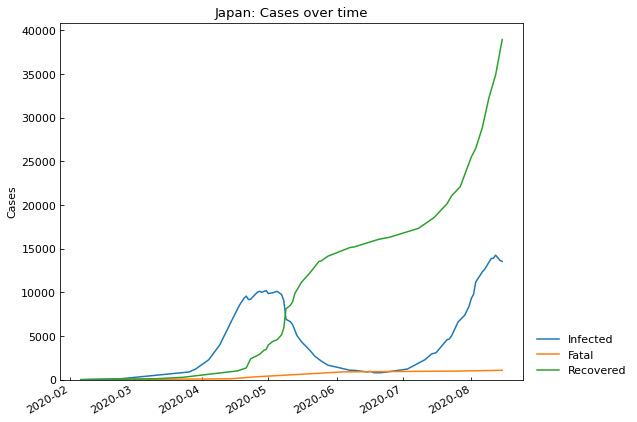

,Date,Confirmed,Infected,Fatal,Recovered
182,2020-08-11,48928,13901,1052,33975
183,2020-08-12,50210,14263,1059,34888
184,2020-08-13,51147,13950,1063,36134
185,2020-08-14,52217,13665,1073,37479
186,2020-08-15,53577,13547,1085,38945


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

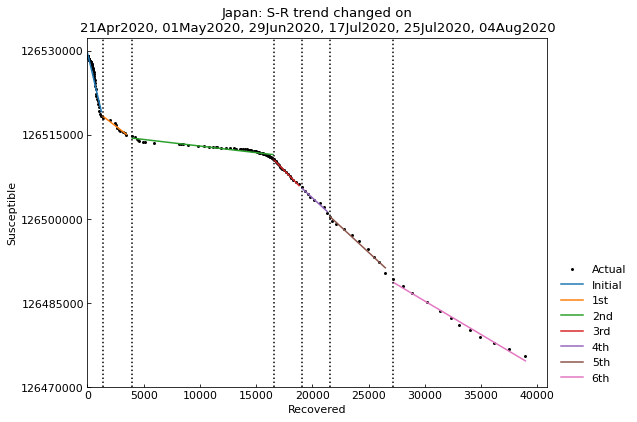

,Type,Start,End,Population
1st,Past,21Apr2020,30Apr2020,126529100
2nd,Past,01May2020,28Jun2020,126529100
3rd,Past,29Jun2020,16Jul2020,126529100
4th,Past,17Jul2020,24Jul2020,126529100
5th,Past,25Jul2020,03Aug2020,126529100
6th,Past,04Aug2020,15Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	6th phase (04Aug2020 - 15Aug2020): finished 1059 trials in 0 min 30 sec

	1st phase (21Apr2020 - 30Apr2020): finished  443 trials in 0 min 10 sec

	4th phase (17Jul2020 - 24Jul2020): finished 1131 trials in 0 min 30 sec

	3rd phase (29Jun2020 - 16Jul2020): finished 1926 trials in 1 min  0 sec

	2nd phase (01May2020 - 28Jun2020): finished 1889 trials in 1 min  0 sec

	5th phase (25Jul2020 - 03Aug2020): finished 1954 trials in 1 min  0 sec

Completed optimization. Total: 1 min 41 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],alpha1 [-],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,21Apr2020,30Apr2020,126529100,SIR-F,1.31,0.066183,0.000165,0.016995,0.011971,720,29,0.066,3035,41,0.141262,443,0 min 10 sec
2nd,Past,01May2020,28Jun2020,126529100,SIR-F,0.25,0.078049,0.000785,0.010023,0.036286,720,49,0.078,637,13,0.479094,1889,1 min 0 sec
3rd,Past,29Jun2020,16Jul2020,126529100,SIR-F,2.07,0.000153,0.000177,0.071314,0.034264,720,7,0.000,2830,14,0.036101,1926,1 min 0 sec
4th,Past,17Jul2020,24Jul2020,126529100,SIR-F,2.09,0.001252,0.000001,0.068082,0.032551,720,7,0.001,347168,15,0.019766,1131,0 min 30 sec
5th,Past,25Jul2020,03Aug2020,126529100,SIR-F,1.82,0.000475,0.000139,0.062935,0.034479,720,7,0.000,3595,14,0.026299,1954,1 min 0 sec
6th,Past,04Aug2020,15Aug2020,126529100,SIR-F,1.24,0.001155,0.000131,0.049506,0.039866,720,10,0.001,3817,12,0.029950,1059,0 min 30 sec


### Accuracy of estimation

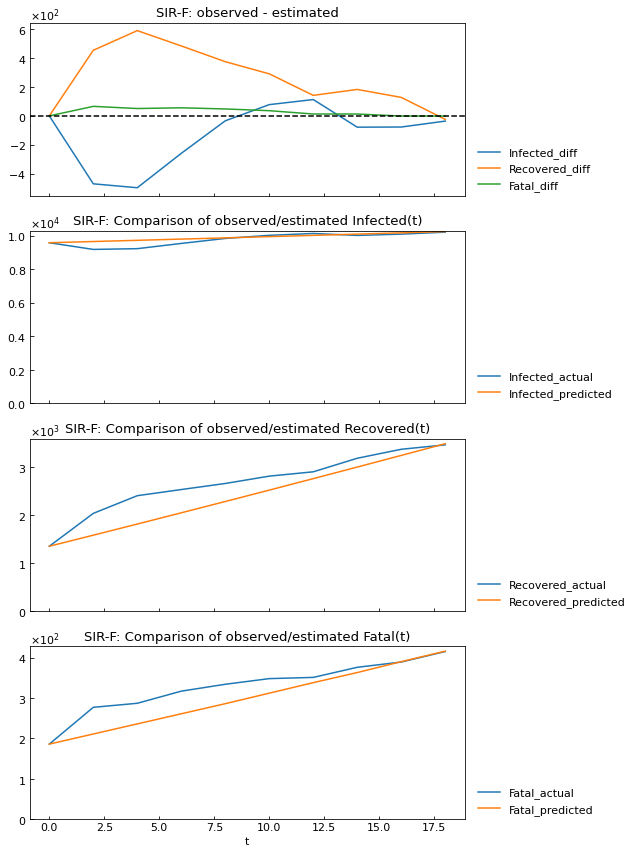

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

2.09

### Show parameter history

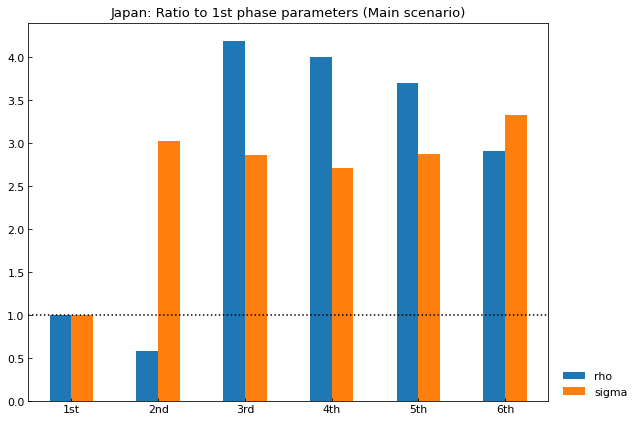

,1st,2nd,3rd,4th,5th,6th
rho,1.0,0.589737,4.196153,4.005995,3.703126,2.913000
sigma,1.0,3.031295,2.862346,2.719231,2.880322,3.330349


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

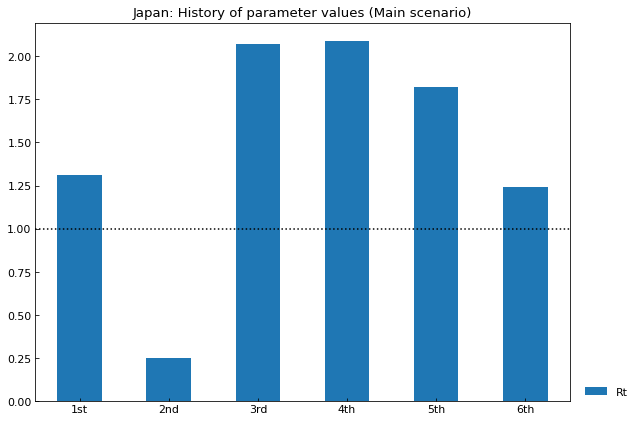

,1st,2nd,3rd,4th,5th,6th
Rt,1.31,0.25,2.07,2.09,1.82,1.24


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

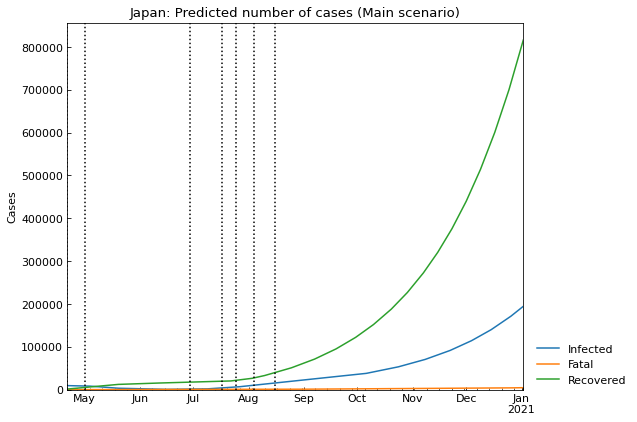

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,941708,4453,181001,756254
253,2020-12-30,959667,4522,184320,770825
254,2020-12-31,977950,4592,187696,785662
255,2021-01-01,996562,4663,191131,800768
256,2021-01-02,1015508,4735,194626,816147


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.039866341377012775

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.07973268275402555

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  21Apr2020  30Apr2020   126529100  SIR-F  1.31   
         2nd      Past  01May2020  28Jun2020   126529100  SIR-F  0.25   
         3rd      Past  29Jun2020  16Jul2020   126529100  SIR-F  2.07   
         4th      Past  17Jul2020  24Jul2020   126529100  SIR-F  2.09   
         5th      Past  25Jul2020  03Aug2020   126529100  SIR-F  1.82   
         6th      Past  04Aug2020  15Aug2020   126529100  SIR-F  1.24   
         7th    Future  16Aug2020  01Jan2021   126529100  SIR-F  1.24   
Medicine 1st      Past  21Apr2020  30Apr2020   126529100  SIR-F  1.31   
         2nd      Past  01May2020  28Jun2020   126529100  SIR-F  0.25   
         3rd      Past  29Jun2020  16Jul2020   126529100  SIR-F  2.07   
         4th      Past  17Jul2020  24Jul2020   126529100  SIR-F  2.09   
         5th      Past  25Jul2020  03Aug2020   126529100  SIR-F  1.82   
         6th      Past  04Aug2020  15Aug2020   126529100  SIR-F  1.24   
         7th    Future  16Aug2020  15Sep2020   126529100  SIR-F  1.24   
         8th    Future  16Sep2020  01Jan2021   126529100  SIR-F  0.62   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     1st    0.066183  0.000165  0.016995  0.011971  720            29   
         2nd    0.078049  0.000785  0.010023  0.036286  720            49   
         3rd    0.000153  0.000177  0.071314  0.034264  720             7   
         4th    0.001252  0.000001  0.068082  0.032551  720             7   
         5th    0.000475  0.000139  0.062935  0.034479  720             7   
         6th    0.001155  0.000131  0.049506  0.039866  720            10   
         7th    0.001155  0.000131  0.049506  0.039866  720            10   
Medicine 1st    0.066183  0.000165  0.016995  0.011971  720            29   
         2nd    0.078049  0.000785  0.010023  0.036286  720            49   
         3rd    0.000153  0.000177  0.071314  0.034264  720             7   
         4th    0.001252  0.000001  0.068082  0.032551  720             7   
         5th    0.000475  0.000139  0.062935  0.034479  720             7   
         6th    0.001155  0.000131  0.049506  0.039866  720            10   
         7th    0.001155  0.000131  0.049506  0.039866  720            10   
         8th    0.001155  0.000131  0.049506  0.079733  720            10   

                alpha1 [-]  1/alpha2 [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                
Main     1st         0.066            3035             41   0.141262    443   
         2nd         0.078             637             13   0.479094   1889   
         3rd         0.000            2830             14  0.0361014   1926   
         4th         0.001          347168             15  0.0197657   1131   
         5th         0.000            3595             14  0.0262987   1954   
         6th         0.001            3817             12    0.02995   1059   
         7th         0.001            3817             12          -      -   
Medicine 1st         0.066            3035             41   0.141262    443   
         2nd         0.078             637             13   0.479094   1889   
         3rd         0.000            2830             14  0.0361014   1926   
         4th         0.001          347168             15  0.0197657   1131   
         5th         0.000            3595             14  0.0262987   1954   
         6th         0.001            3817             12    0.02995   1059   
         7th         0.001            3817             12          -      -   
         8th         0.001            3817              6          -      -   

                     Runtime  
Scenario Phase                
Main     1st    0 min 10 sec  
         2nd    1 min  0 sec 

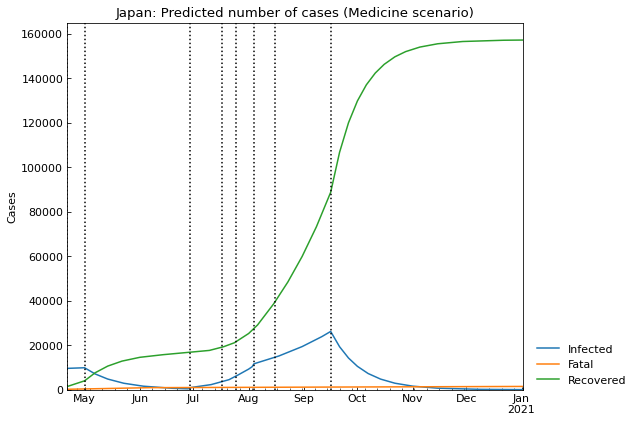

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,158659,1467,47,157145
253,2020-12-30,158663,1467,44,157152
254,2020-12-31,158667,1467,41,157159
255,2021-01-01,158671,1467,39,157165
256,2021-01-02,158674,1467,36,157171


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,8th_Rt
Main,194626,02Jan2021,194626,4735,-
Medicine,26188,16Sep2020,36,1467,0.62
